### MSc Computer Science, Data Science @UniPD
### Optimization Methods for Data Science
---

In [75]:
from os.path import isdir
from os import mkdir

env = 'pc'  # 'pc', 'colab'
git_download_path = 'https://raw.githubusercontent.com/PashaIanko/Semi-Supervised-Labelling/full_testing/'
experiment = 'Exp5/'

exp_dir = ''
if env == 'pc':
    exp_dir = f'C:/Users/79137/Pasha/2. UNIPD/Semester 2/Optimization for Data Science/Homeworks/HW 1/Semi-Supervised-Labelling/{experiment}'
elif env == 'colab':
    exp_dir = f'/content/drive/MyDrive/UNIPD/ODS/HW1/{experiment}'

assert(isdir(exp_dir))

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import log

In [77]:
from os.path import isfile

exp_params = pd.read_csv(f'{exp_dir}experiment_params.csv')
exp_params.head()

,Unnamed: 0,iters_limit,d_loss_limit,stop_loss,learning_rate,n points
0,0,20,0.0,0,0.001,500


In [78]:
metrics_res = pd.read_csv(f'{exp_dir}metrics res.csv')
metrics_res.head()

,Unnamed: 0,CPU total time,N iterations,Final accuracy,CPU total time_norm,N iterations_norm,Final accuracy_norm
0,GD,10.573890,19,1.0,1.000000,1.000000,1.0
1,BCGD permutation,9.762517,18,1.0,0.923266,0.947368,1.0
2,BCGD cyclic,9.709042,18,1.0,0.918209,0.947368,1.0


In [79]:
train_res = pd.read_csv(f'{exp_dir}res.csv')
train_res.head()

,Unnamed: 0,GD loss,BCGD permutation loss,BCGD cyclic loss,GD cpu,BCGD permutation cpu,BCGD cyclic cpu,GD acc,BCGD permutation acc,BCGD cyclic acc
0,0,1107.510152,1107.510152,1107.510152,0.261332,0.230540,0.240228,0.052,0.052,0.052
1,1,1083.645098,1080.846428,1080.844116,0.835035,0.751159,0.757606,1.000,1.000,1.000
2,2,1066.531937,1062.414583,1062.387235,1.420240,1.293130,1.269916,1.000,1.000,1.000
3,3,1053.867079,1049.263410,1049.206765,1.945552,1.854749,1.796797,1.000,1.000,1.000
4,4,1044.298913,1039.677853,1039.597572,2.470946,2.376866,2.320974,1.000,1.000,1.000


# Losses VS iterations

In [80]:
cols_with_loss = [c for c in train_res.columns if 'loss' in c]
loss_dict = {}

for c in cols_with_loss:
    loss = train_res[c].values
    model_name = ' '.join(c.split(' ')[:-1])
    loss_dict[model_name] = loss

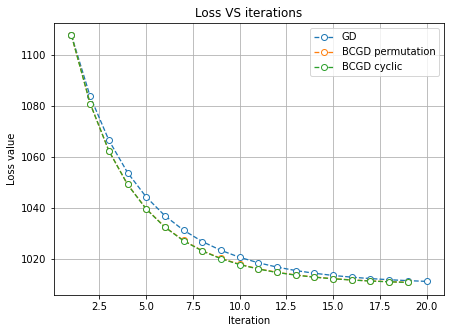

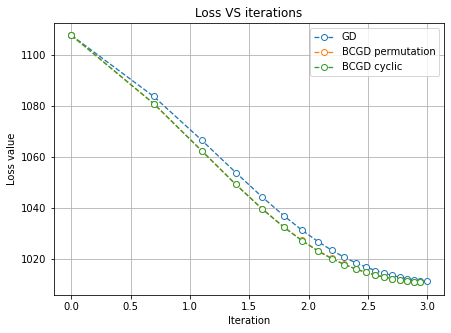

In [81]:
def plot_curves(curves_dict, title, y_label, figsize, log_axis_):
    _, ax = plt.subplots(figsize = figsize)

    for _, curve_res in curves_dict.items():

        x_data = []
        if log_axis_:
            x_data = [log(i + 1) for i in range(len(curve_res))]
        else:
            x_data = [i+1 for i in range(len(curve_res))]

        ax.plot(
            x_data,
            curve_res,
            marker = 'o',
            linestyle = '--',
            linewidth = 1.3,
            markerfacecolor = 'white',
            # markersize = 2
        )
    plt.legend(list(curves_dict.keys()))
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel(y_label)
    plt.grid()


plot_curves(
    loss_dict,
    'Loss VS iterations',
    y_label = 'Loss value',
    figsize = (7, 5),
    log_axis_=False
)

plot_curves(
    loss_dict,
    'Loss VS iterations',
    y_label = 'Loss value',
    figsize = (7, 5),
    log_axis_=True
)

# Losses VS CPU

In [82]:
train_res.head()

,Unnamed: 0,GD loss,BCGD permutation loss,BCGD cyclic loss,GD cpu,BCGD permutation cpu,BCGD cyclic cpu,GD acc,BCGD permutation acc,BCGD cyclic acc
0,0,1107.510152,1107.510152,1107.510152,0.261332,0.230540,0.240228,0.052,0.052,0.052
1,1,1083.645098,1080.846428,1080.844116,0.835035,0.751159,0.757606,1.000,1.000,1.000
2,2,1066.531937,1062.414583,1062.387235,1.420240,1.293130,1.269916,1.000,1.000,1.000
3,3,1053.867079,1049.263410,1049.206765,1.945552,1.854749,1.796797,1.000,1.000,1.000
4,4,1044.298913,1039.677853,1039.597572,2.470946,2.376866,2.320974,1.000,1.000,1.000


In [83]:
loss_dict

{'GD': array([1107.5101524 , 1083.6450982 , 1066.53193672, 1053.86707928,
        1044.29891255, 1036.97010312, 1031.30306262, 1026.89107741,
        1023.43857234, 1020.72588969, 1018.58718413, 1016.89581349,
        1015.55427653, 1014.48705604, 1013.63540123, 1012.95345209,
        1012.40531943, 1011.96286131, 1011.60397607, 1011.31128373]),
 'BCGD permutation': array([1107.5101524 , 1080.84642785, 1062.41458314, 1049.26341027,
        1039.67785284, 1032.59300255, 1027.30052463, 1023.31477592,
        1020.2930647 , 1017.99064018, 1016.22810241, 1014.8726211 ,
        1013.82576099, 1013.01324703, 1012.37977249, 1011.88268417,
        1011.49058741, 1011.17862496, 1010.92841761,           nan]),
 'BCGD cyclic': array([1107.5101524 , 1080.84411633, 1062.38723488, 1049.20676494,
        1039.59757243, 1032.49335532, 1027.18894625, 1023.1990425 ,
        1020.18025165, 1017.8848266 , 1016.13153821, 1014.78648078,
        1013.74997896, 1012.9474221 , 1012.32272148, 1011.83357082,
   

In [84]:
cols_with_cpu = [c for c in train_res.columns if 'cpu' in c]
cpu_dict = {}
for c in cols_with_cpu:
    cpu = train_res[c]
    model_name = ' '.join(c.split(' ')[:-1])
    cpu_dict[model_name] = cpu

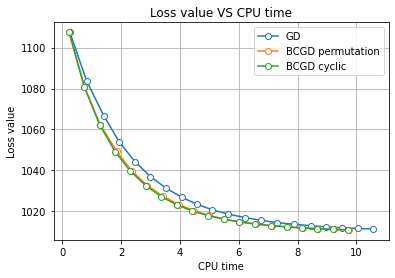

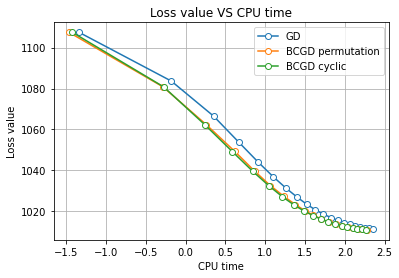

In [85]:
def plot_loss_vs_cpu(loss_dict_, cpu_dict_, log_axis_):
    fig, ax = plt.subplots()

    assert(loss_dict_.keys() == cpu_dict_.keys())
    
    for model_name, loss in loss_dict_.items(): 
        cpu = cpu_dict_[model_name]

        if log_axis_:
            cpu = log(cpu)


        ax.plot(
            cpu, 
            loss,
            marker = 'o',
            markerfacecolor = 'white'
        )
    
    plt.legend(loss_dict_.keys())
    plt.xlabel('CPU time')
    plt.ylabel('Loss value')
    plt.title('Loss value VS CPU time')
    plt.grid()


plot_loss_vs_cpu(
    loss_dict, 
    cpu_dict,
    log_axis_ = False
)

plot_loss_vs_cpu(
    loss_dict, 
    cpu_dict,
    log_axis_ = True
)

# Data preparation

## Saving data

,CPU total time,N iterations,Final accuracy,CPU total time_norm,N iterations_norm,Final accuracy_norm
GD,8.025136,4,1.0,0.969413,1.0,1.0
BCGD permutation,8.278344,4,1.0,1.000000,1.0,1.0
BCGD cyclic,8.145541,4,1.0,0.983958,1.0,1.0


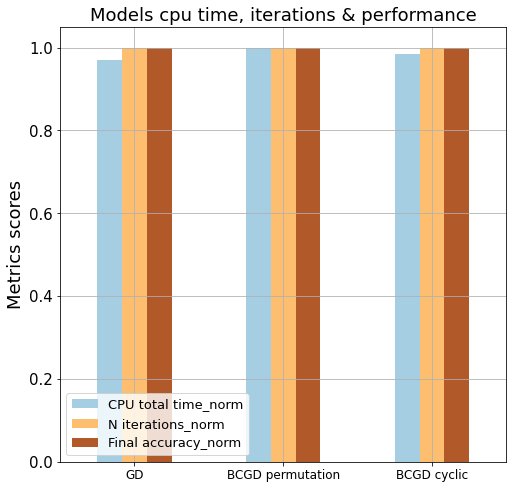

In [46]:
bar_metrics = pd.DataFrame.from_dict(cpu_times_total, orient='index', columns = ['CPU total time'])
bar_metrics['N iterations'] = n_iters.values()

final_accuracies = {name: acc[-1] for name, acc in accuracies.items()}
bar_metrics['Final accuracy'] = final_accuracies.values()



normalize_cols(bar_metrics)
cols_to_plot = [c for c in bar_metrics.columns if 'norm' in c]

plot_bar_metrics(bar_metrics.loc[:, cols_to_plot])
bar_metrics.to_csv(full_dir + 'metrics res.csv')

bar_metrics.head()

## Graphics

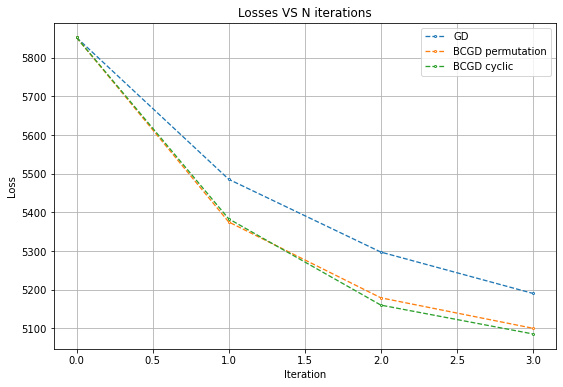

In [47]:
def plot_curves(curves_dict, title, y_label, figsize):
    _, ax = plt.subplots(figsize = figsize)

    for _, curve_res in curves_dict.items():
        ax.plot(
            curve_res,
            marker = 'o',
            linestyle = '--',
            linewidth = 1.3,
            markerfacecolor = 'white',
            markersize = 2
        )
    plt.legend(list(curves_dict.keys()))
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel(y_label)
    plt.grid()


# plot_curves({'Cyclic':losses['BCGD cyclic']}, 'Losses cyclic', y_label = 'Loss')
# plot_curves({'GD':losses['GD']}, 'Losses GD', y_label = 'Loss')
plot_curves(
    losses,
    'Losses VS N iterations', 
    y_label = 'Loss',
    figsize = (9, 6)
)

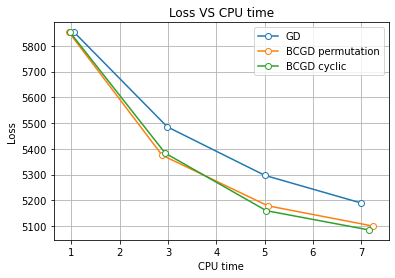

In [48]:
def plot_losses_vs_cpu(losses_, cpu_times_):
    assert(list(losses_.keys()) == list(cpu_times_.keys()))

    _, ax = plt.subplots()

    for model_name, loss in losses_.items():
        cpu_time = cpu_times_[model_name]

        ax.plot(
            cpu_time,
            loss,
            marker = 'o',
            markerfacecolor = 'white'
        )
    plt.xlabel('CPU time')
    plt.ylabel('Loss')
    plt.title('Loss VS CPU time')
    plt.legend(list(losses_.keys()))
    plt.grid()


plot_losses_vs_cpu(losses, cpu_times)

# Real dataset

In [ ]:
# df = pd.read_csv('Pokemon.csv')

In [ ]:
# df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [ ]:
# df.head()
# X_real = df.loc[:, ['total', 'sp_attack']].values
# Y_real = df['legendary'].astype('int').values


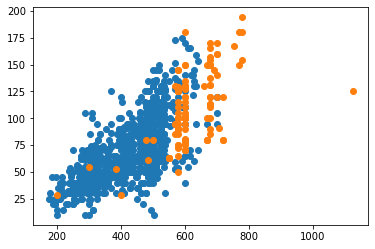

In [ ]:
# plot_clusters(
#     X_real,
#     Y_real
# )

In [ ]:
# Y_real_delabeled = delabel_data(
#     Y_real,
#     labeled_percent = 0.16, # DataProperties.labeled_percentage,
#     delabel_value = DataProperties.unlabeled
# )

Found 954 instances of object 0
We have to delabel 801 instances
Found 118 instances of object 1
We have to delabel 99 instances


In [ ]:
# wine=datasets.load_wine()

# #Conver to pandas dataframe
# data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

# data = data.loc[
#     (data['target'] == 1) | (data['target'] == 0),
#     ['od280/od315_of_diluted_wines', 'alcohol', 'target']
# ]

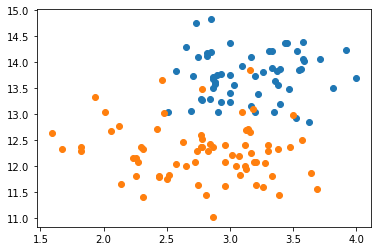

In [ ]:
# X_real = data.loc[
#     :,
#     ['od280/od315_of_diluted_wines', 'alcohol']
# ].values
# Y_real = data['target'].values

# plot_clusters(
#     X_real,
#     Y_real
# )

In [ ]:
# solver = GradientDescentSolver(
#     lr_strategy = 'lr_constant',
#     learning_rate = 0.0001,
#     similarity_func = None
# )

# Y_real_preds = solver.solve(
#     X_real,
#     Y_real_delabeled,
#     iter_limit=5,
#     delta_loss_limit = 0.003,
#     stop_loss = 20
# )

Iteration: 0, Loss: 24173.807351957803, delta loss: 24173.807351957803
Iteration: 1, Loss: 24173.807351957803, delta loss: 0.0
Iteration: 2, Loss: 24173.807351957803, delta loss: 0.0
Iteration: 3, Loss: 24173.807351957803, delta loss: 0.0
Iteration: 4, Loss: 24173.807351957803, delta loss: 0.0


